Importing pakages

In [1]:
# Import Pakages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib as mpl
from matplotlib.colors import LogNorm

opening the data

In [2]:
data = xr.open_dataset("ds_zeppelin_2010_2019.nc")

In [3]:
data

<xarray.Dataset>
Dimensions:            (D: 33, time: 53132, time_traj: 96)
Coordinates:
  * D                  (D) float64 10.0 11.22 12.59 14.12 ... 316.2 354.8 398.1
  * time               (time) datetime64[ns] 2010-08-03 ... 2019-12-31T23:00:00
  * time_traj          (time_traj) int64 0 1 2 3 4 5 6 ... 89 90 91 92 93 94 95
Data variables:
    pnsd               (time, D) float64 ...
    pnsd_nolog         (time, D) float64 ...
    conc_10_50         (time) float64 ...
    conc_50_100        (time) float64 ...
    conc_100_400       (time) float64 ...
    condensation_sink  (time) float64 ...
    Rainfall           (time, time_traj) float64 ...
    Solar_radiation    (time, time_traj) float64 ...
    x                  (time, time_traj) float64 ...
    y                  (time, time_traj) float64 ...
    z                  (time, time_traj) float64 ...

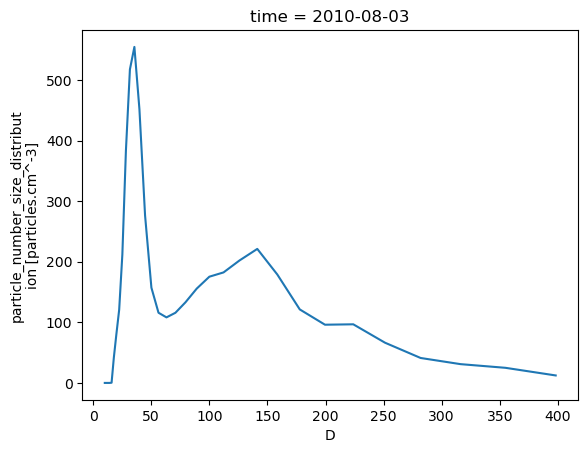

In [4]:
data["pnsd"].isel(time=0).plot()

In [5]:
mean_pnsd_per_month = data["pnsd"].groupby(data.time.dt.month).mean()

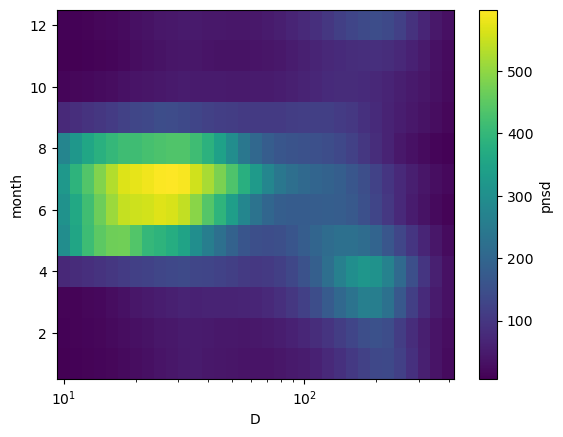

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
mean_pnsd_per_month.plot()
ax.set_xscale("log")

In [7]:
#cluster = KMeans().fit(data["pnsd"])

In [8]:
k_means_data = np.array(data["pnsd"])

In [9]:
sc = MinMaxScaler()
# Scaling data
k_means_data_normalize = sc.fit_transform(k_means_data.T).T

In [10]:
cluster_count = 6

In [11]:
km = KMeans().fit(k_means_data_normalize)

In [12]:
km

KMeans()

In [13]:
label_inds = km.labels_

In [14]:
#km.cluster_centers_

In [15]:
data["clusters"] = (['time'], label_inds)

In [16]:
data

<xarray.Dataset>
Dimensions:            (D: 33, time: 53132, time_traj: 96)
Coordinates:
  * D                  (D) float64 10.0 11.22 12.59 14.12 ... 316.2 354.8 398.1
  * time               (time) datetime64[ns] 2010-08-03 ... 2019-12-31T23:00:00
  * time_traj          (time_traj) int64 0 1 2 3 4 5 6 ... 89 90 91 92 93 94 95
Data variables:
    pnsd               (time, D) float64 2.79e-29 2.786e-29 ... 6.378 2.078e-29
    pnsd_nolog         (time, D) float64 ...
    conc_10_50         (time) float64 139.8 156.9 129.3 ... 15.68 13.67 10.09
    conc_50_100        (time) float64 40.2 20.7 15.64 ... 9.881 11.78 7.346
    conc_100_400       (time) float64 63.73 30.91 21.08 ... 34.42 28.78 25.85
    condensation_sink  (time) float64 0.000365 0.0002073 ... 0.0001625 0.0001385
    Rainfall           (time, time_traj) float64 ...
    Solar_radiation    (time, time_traj) float64 ...
    x                  (time, time_traj) float64 ...
    y                  (time, time_traj) float64 ...
    z                  (time, time_traj) float64 ...
    clusters           (time) int32 0 0 0 0 0 0 4 4 4 2 ... 6 5 7 6 1 6 6 5 5 6

In [17]:
cluster_curves = data["pnsd"].groupby(data["clusters"]).mean()

In [18]:
cluster_curves

<xarray.DataArray 'pnsd' (clusters: 8, D: 33)>
array([[  77.60124851,   92.26982225,  111.92929831,  137.66146165,
         174.85695656,  227.65840146,  293.93367061,  387.2402167 ,
         495.37410703,  600.36091994,  683.07250152,  695.97116689,
         641.94584655,  550.64520442,  438.10781687,  322.50053138,
         239.10460769,  184.90411037,  152.957785  ,  137.91175336,
         131.28978455,  128.12562618,  126.54807155,  124.10117181,
         118.51027209,  107.22857155,   91.1807456 ,   71.74158814,
          52.25119241,   36.99277103,   24.8174191 ,   15.81940004,
          10.16725387],
       [   8.29196967,    8.83224032,   10.06609375,   11.86888596,
          14.81936795,   19.19512254,   24.06311117,   29.99953873,
          35.99079219,   40.99849857,   44.43093273,   44.82296677,
          42.38381329,   38.40406034,   33.60554311,   29.43140486,
          27.60437988,   27.96145212,   30.40529315,   34.72613286,
          41.31906952,   50.95572143,   66.03194054,   86.38349574,
         119.71289392,  175.48270968,  225.73883633,  244.99748526,
         212.10643615,  160.89076844,  112.68828783,   73.00315655,
          46.00483828],
       [ 988.60569002, 1124.69257025, 1180.89168197, 1155.34535238,
        1049.95837467,  875.42736363,  667.60817498,  476.91067184,
...
          91.80826093,   70.7553573 ,   52.11065015,   36.28109442,
          24.59320725],
       [   8.15641389,    9.00740008,   10.7825696 ,   12.89482263,
          16.0557303 ,   20.86161367,   25.93975323,   31.93523052,
          38.413957  ,   44.48951284,   48.79625164,   49.85014219,
          50.36734637,   50.3773907 ,   49.92336932,   49.45582546,
          51.415575  ,   57.10845394,   66.41954213,   80.92484453,
         101.72777522,  131.13714942,  171.58736402,  213.71573851,
         245.60186281,  257.95765704,  239.47717899,  204.68450303,
         157.42548251,  115.01307316,   78.942981  ,   50.7533778 ,
          31.6457229 ],
       [  28.74615439,   33.48904669,   41.11129958,   50.55670815,
          62.66804003,   78.17265436,   93.25591368,  107.6965966 ,
         121.55408381,  131.49426734,  136.86373484,  131.8197156 ,
         123.7199035 ,  114.78030146,  105.12466303,   96.0395623 ,
          91.78365372,   91.822957  ,   95.76698304,  103.84520981,
         113.68799786,  123.83701426,  131.17042813,  131.99664488,
         126.58607949,  114.33427533,   97.74416773,   79.80359179,
          61.31660108,   45.39523924,   32.57420558,   21.8832645 ,
          14.38425028]])
Coordinates:
  * D         (D) float64 10.0 11.22 12.59 14.12 ... 281.8 316.2 354.8 398.1
  * clusters  (clusters) int64 0 1 2 3 4 5 6 7

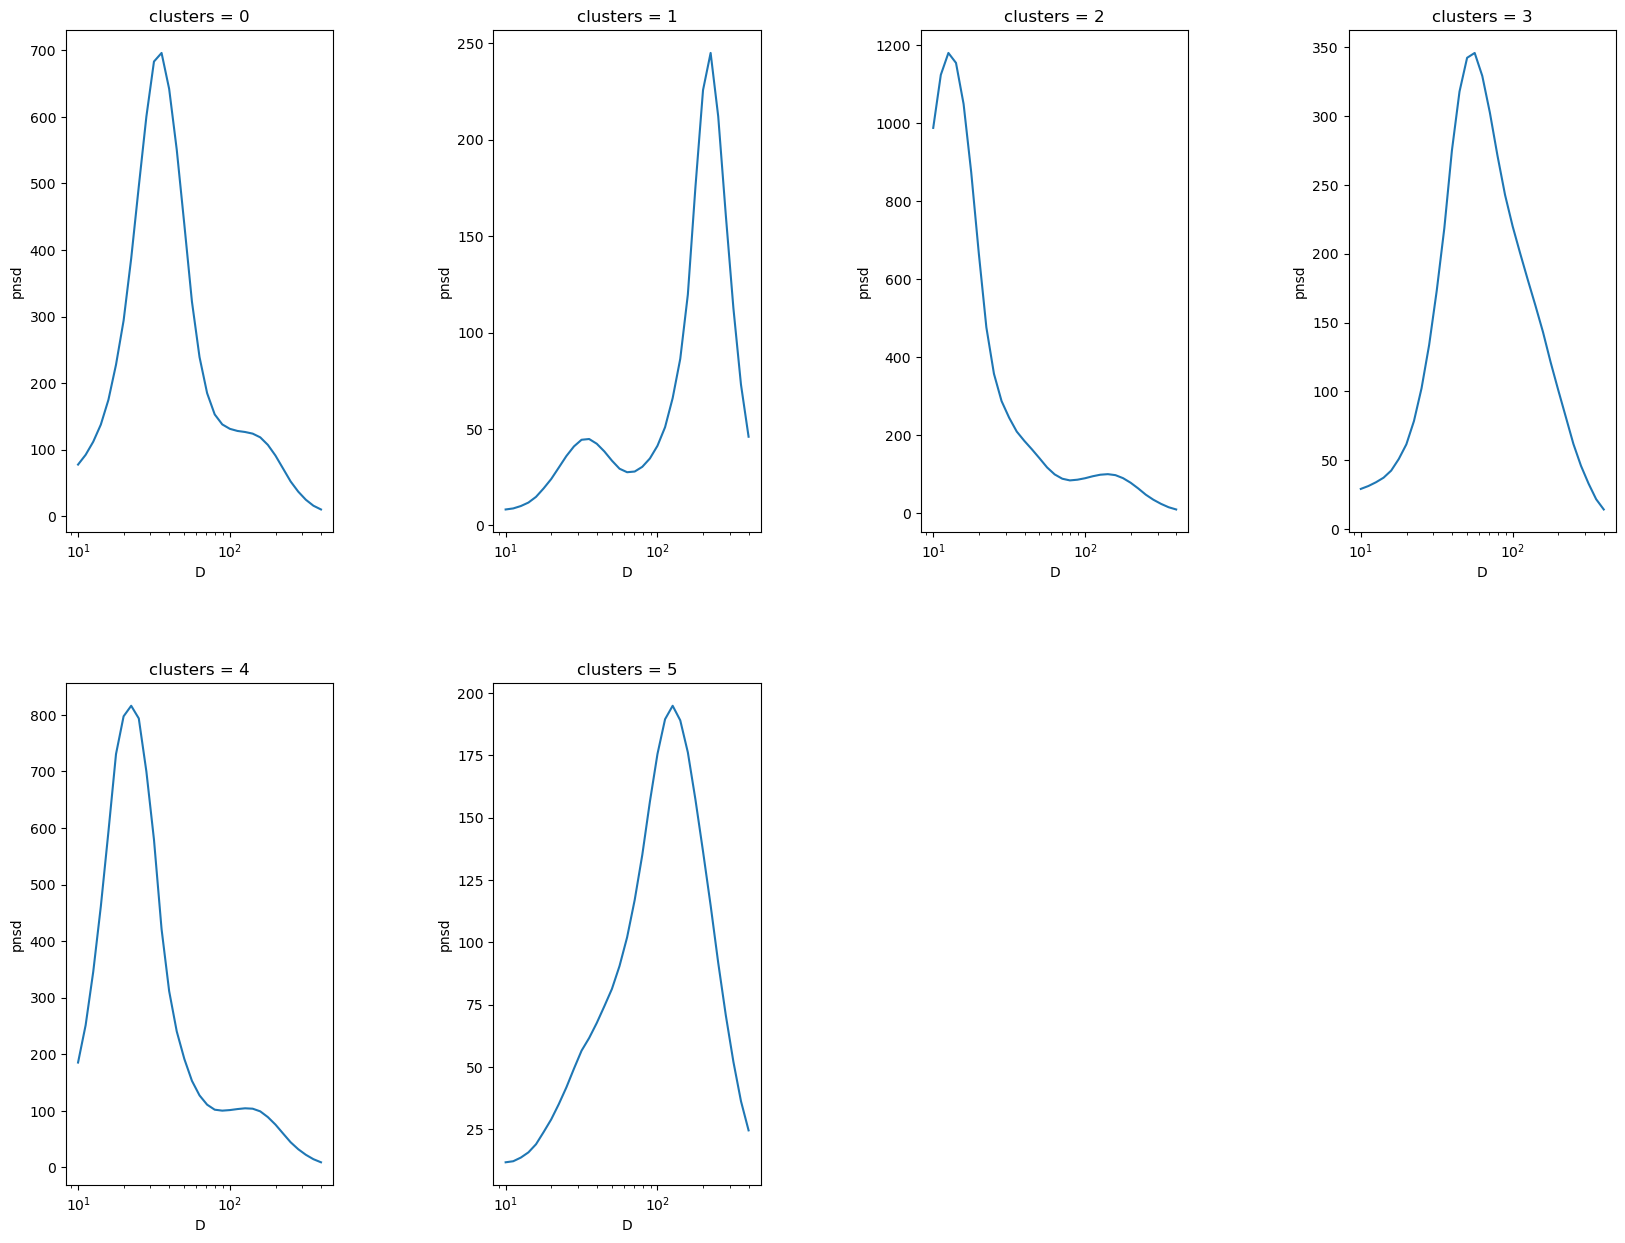

In [19]:
fig = plt.figure(figsize=(20,15))
for i in range(cluster_count):
    ax = fig.add_subplot(2,4,i+1)
    cluster_curves[i].plot()
    ax.set_xscale("log")
    
plt.subplots_adjust(wspace=0.6, hspace=0.3)

Cluster number analysis based on PCA

In [20]:
number_of_components = 33

sc_x = MinMaxScaler()
# Scaling data
k_mean_normalized = sc_x.fit_transform(k_means_data.T).T

pca = PCA(n_components=number_of_components)
transformed_data = pca.fit_transform(k_mean_normalized)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(transformed_data.shape)

[3.69601915e-01 2.27515427e-01 9.86368893e-02 8.45013231e-02
 5.11858153e-02 4.14820197e-02 2.72723677e-02 1.98260070e-02
 1.47632322e-02 1.09532759e-02 8.50879323e-03 6.91270989e-03
 5.57695674e-03 4.80099783e-03 3.98231955e-03 3.48197470e-03
 3.03364301e-03 2.77231418e-03 2.45922798e-03 2.04231599e-03
 1.91058293e-03 1.89324263e-03 1.74867757e-03 1.04809565e-03
 8.00820600e-04 6.61377906e-04 6.38001626e-04 5.34644876e-04
 4.03993548e-04 3.30369182e-04 2.89446834e-04 2.18378294e-04
 2.12842385e-04]
[224.59797223 176.21551757 116.02682497 107.39164106  83.58214974
  75.243445    61.00987656  52.01832357  44.88791667  38.66435223
  34.07789101  30.71587488  27.58908913  25.59790831  23.31346239
  21.79975084  20.34796403  19.45180682  18.32053366  16.69552932
  16.14810894  16.07466245  15.44875885  11.96022042  10.45457404
   9.50087416   9.33146039   8.54223331   7.42550404   6.71488359
   6.28525824   5.45938169   5.3897396 ]
(53132, 33)


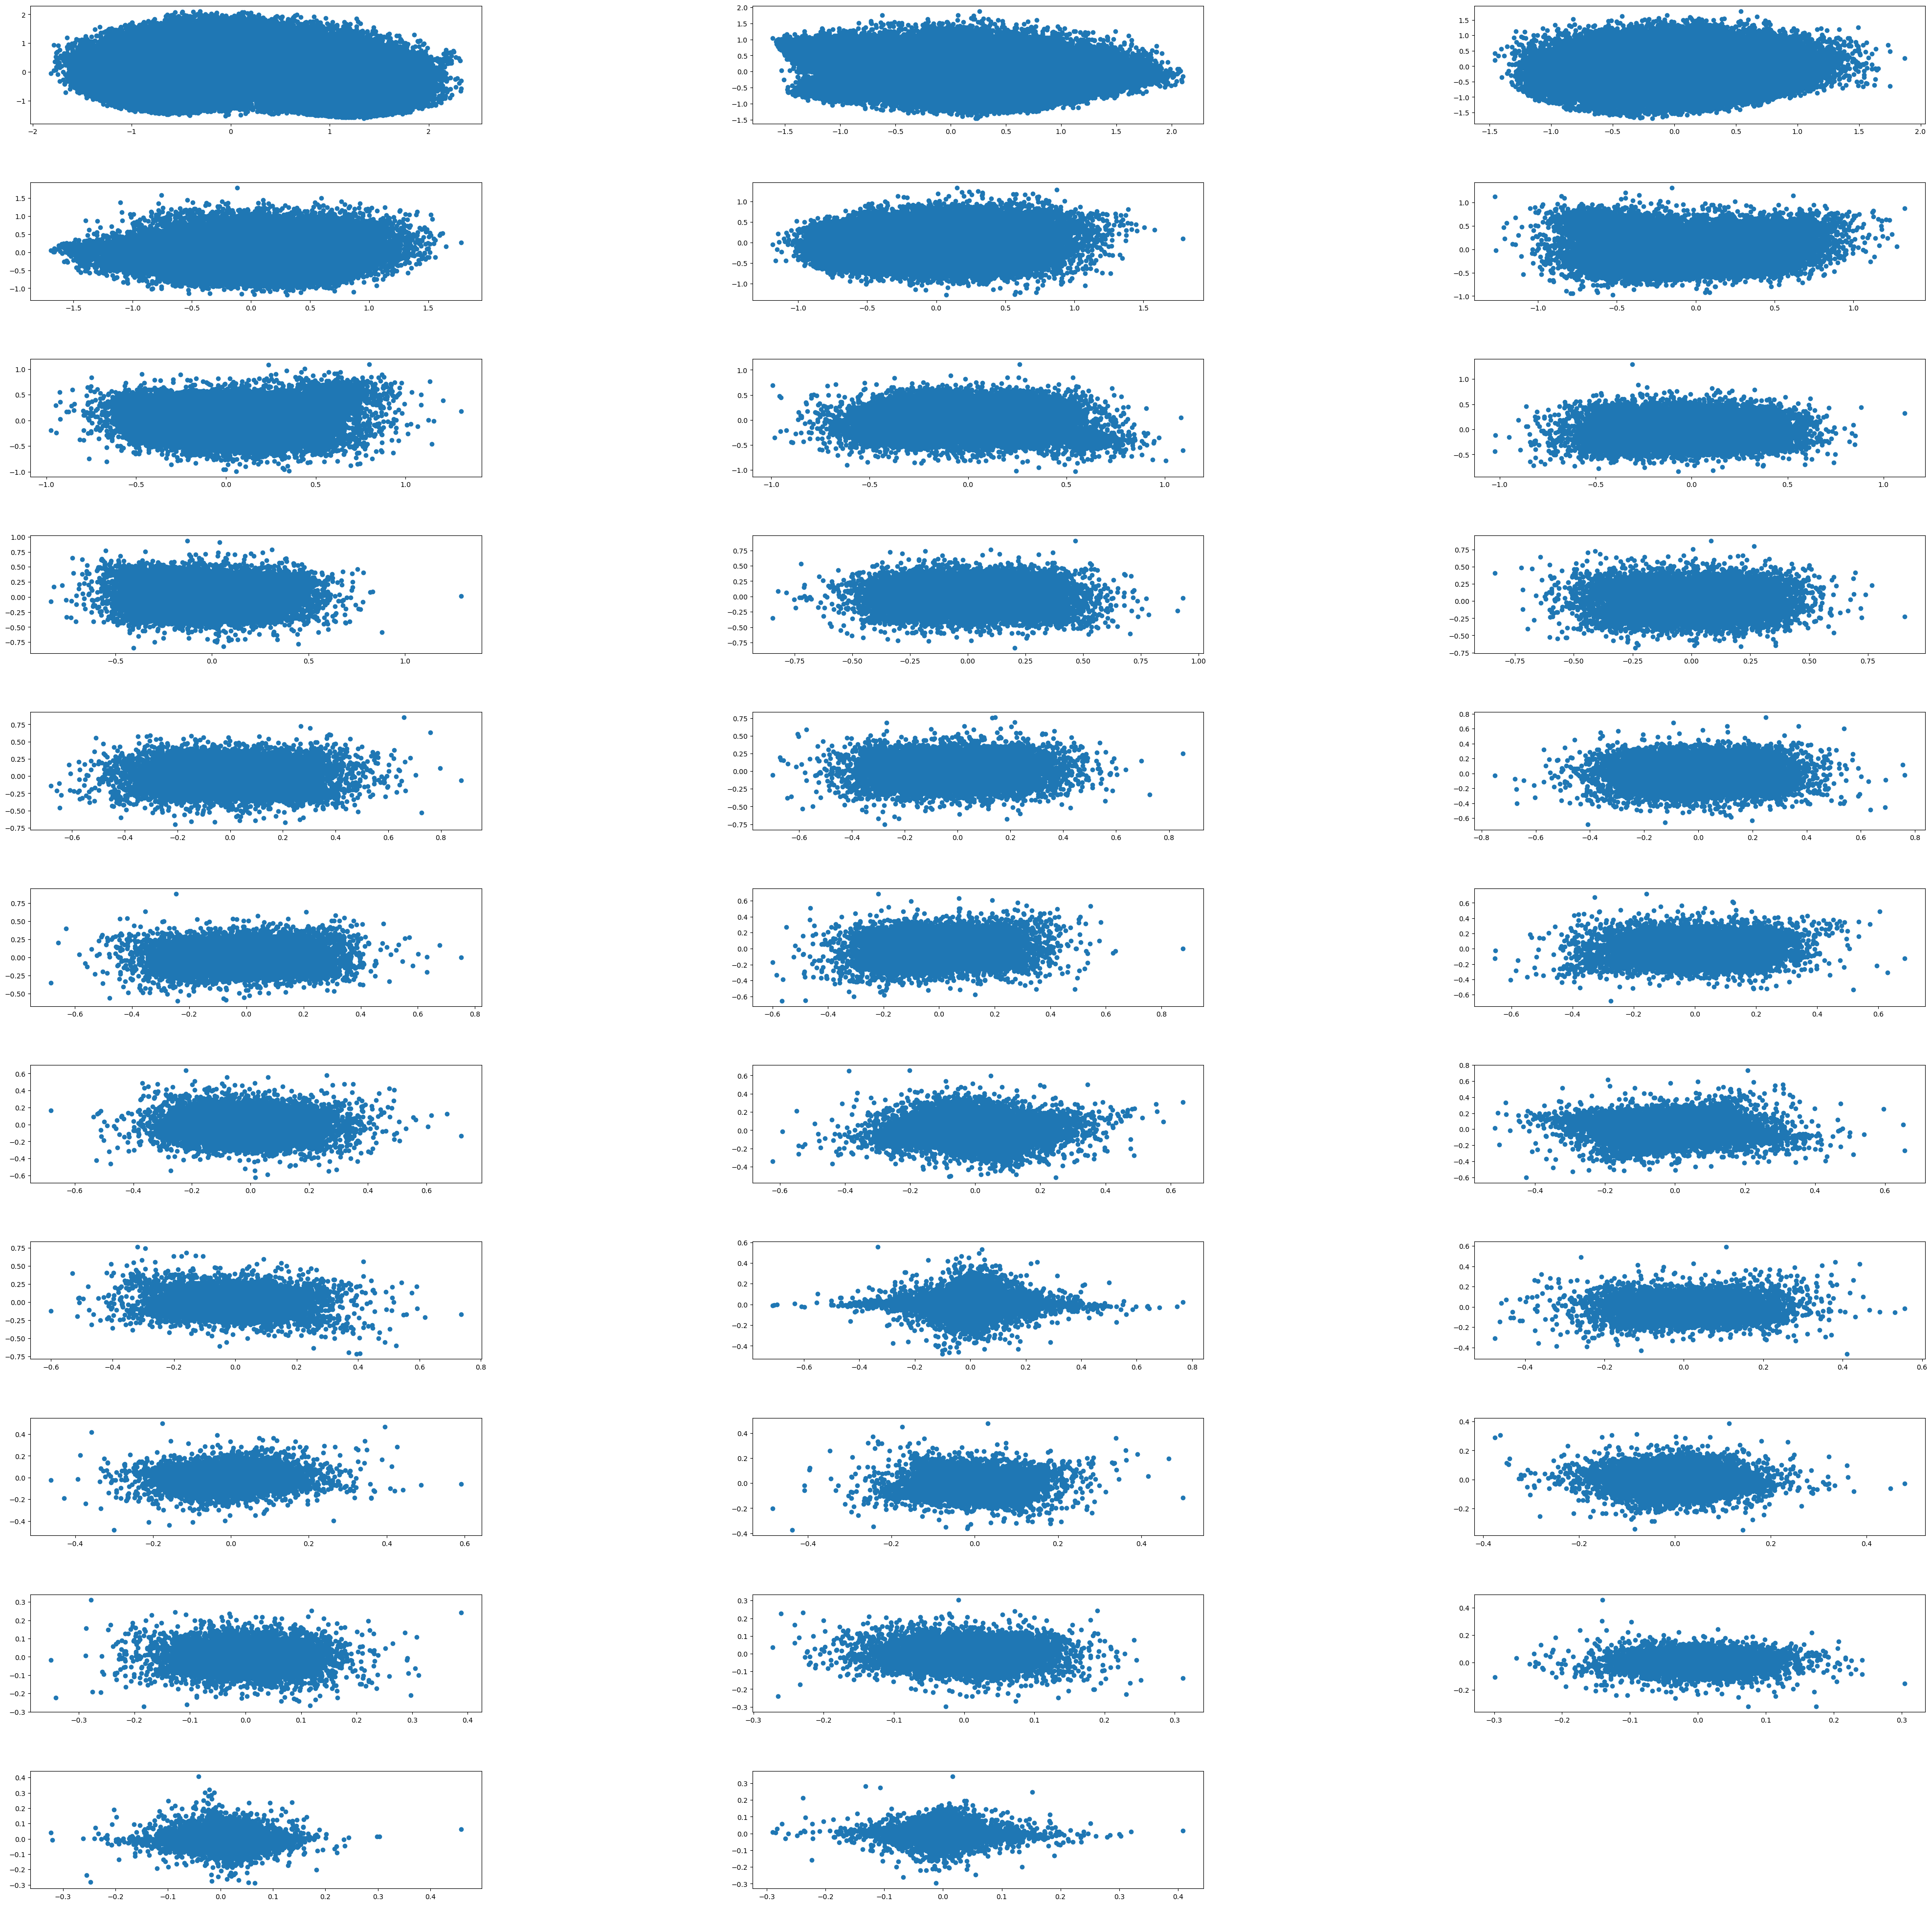

In [21]:
fig = plt.figure(figsize=(50,50))
for i in range(number_of_components-1):
    ax = fig.add_subplot(11,3,i+1)
    ax.scatter(transformed_data[:,i],transformed_data[:,i+1])
    
plt.subplots_adjust(wspace=0.6, hspace=0.5)

In [22]:
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    bit_rgb = np.linspace(0, 1, 256)
    if position is None:
        position = np.linspace(0, 1, len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red': [], 'green': [], 'blue': []}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap', cdict, 256)
    return cmap

def plot_heatmap(x,y):

    cmap2Dhist = make_cmap([(255, 255, 255), (127, 188, 227), (82, 170, 115), (225, 189, 74), (222, 64, 39), (149, 21, 25)], bit=True)

    x_min = np.min(x) - 0.5
    x_max = np.max(x) + 0.5
    y_min = np.min(y) - 0.5
    y_max = np.max(y) + 0.5

    N = int(np.size(transformed_data[:,0]))
    fig = plt.figure()
    ax = fig.subplots()
            
    norm2Dhist = LogNorm(vmin=1, vmax=int(0.025 * N))

    ax.hist2d(x, y, bins=(100,100), range=[[x_min,x_max],[y_min,y_max]], cmap=cmap2Dhist, norm=norm2Dhist, alpha=0.8, zorder=2)
    
    axCB = fig.add_axes([0.935, 0.1, 0.02, 0.85])
    cb1 = mpl.colorbar.ColorbarBase(axCB, cmap=cmap2Dhist, norm=norm2Dhist, orientation='vertical')
    

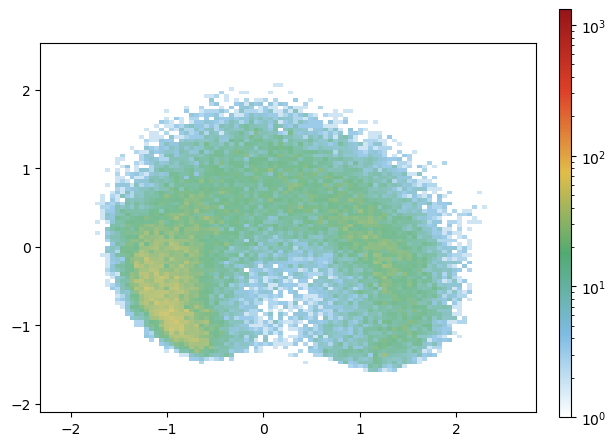

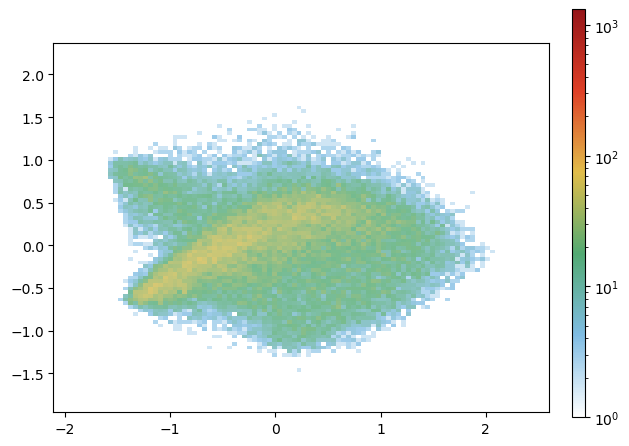

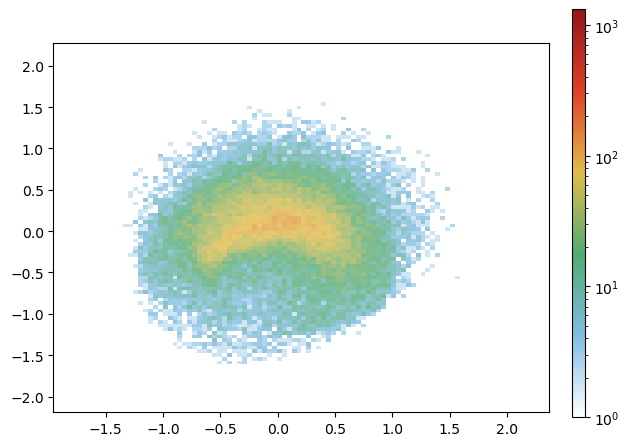

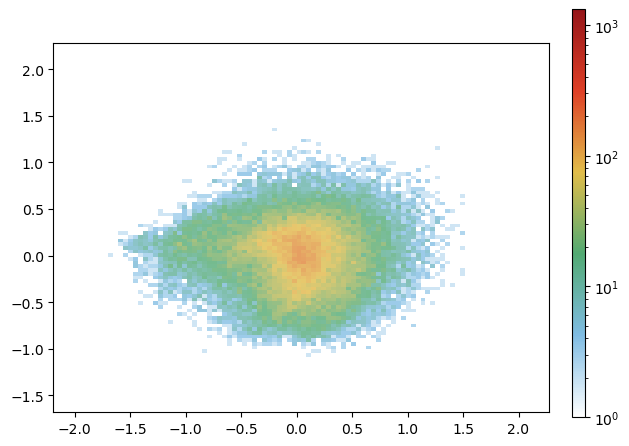

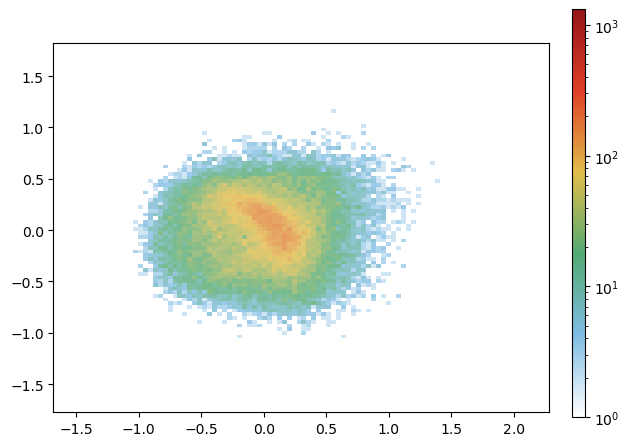

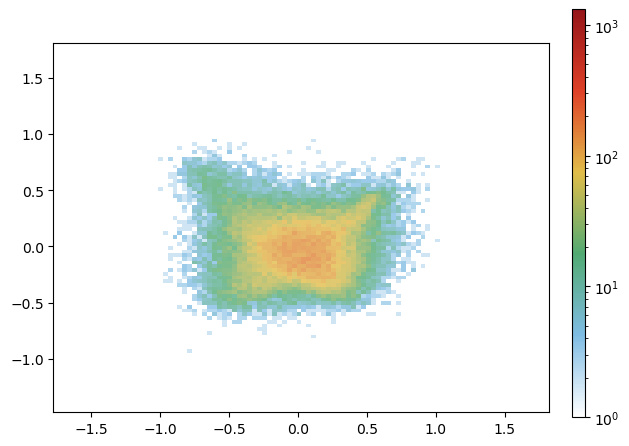

In [23]:
plot_heatmap(transformed_data[:,0],transformed_data[:,1])
plot_heatmap(transformed_data[:,1],transformed_data[:,2])
plot_heatmap(transformed_data[:,2],transformed_data[:,3])
plot_heatmap(transformed_data[:,3],transformed_data[:,4])
plot_heatmap(transformed_data[:,4],transformed_data[:,5])
plot_heatmap(transformed_data[:,5],transformed_data[:,6])

In [26]:
first_second_component_filtering = transformed_data[:,0] < 0

In [27]:
data["component_0_filter"] = (['time'], first_second_component_filtering)

In [28]:
component_0_curves = data["pnsd"].groupby(data["component_0_filter"]).mean()

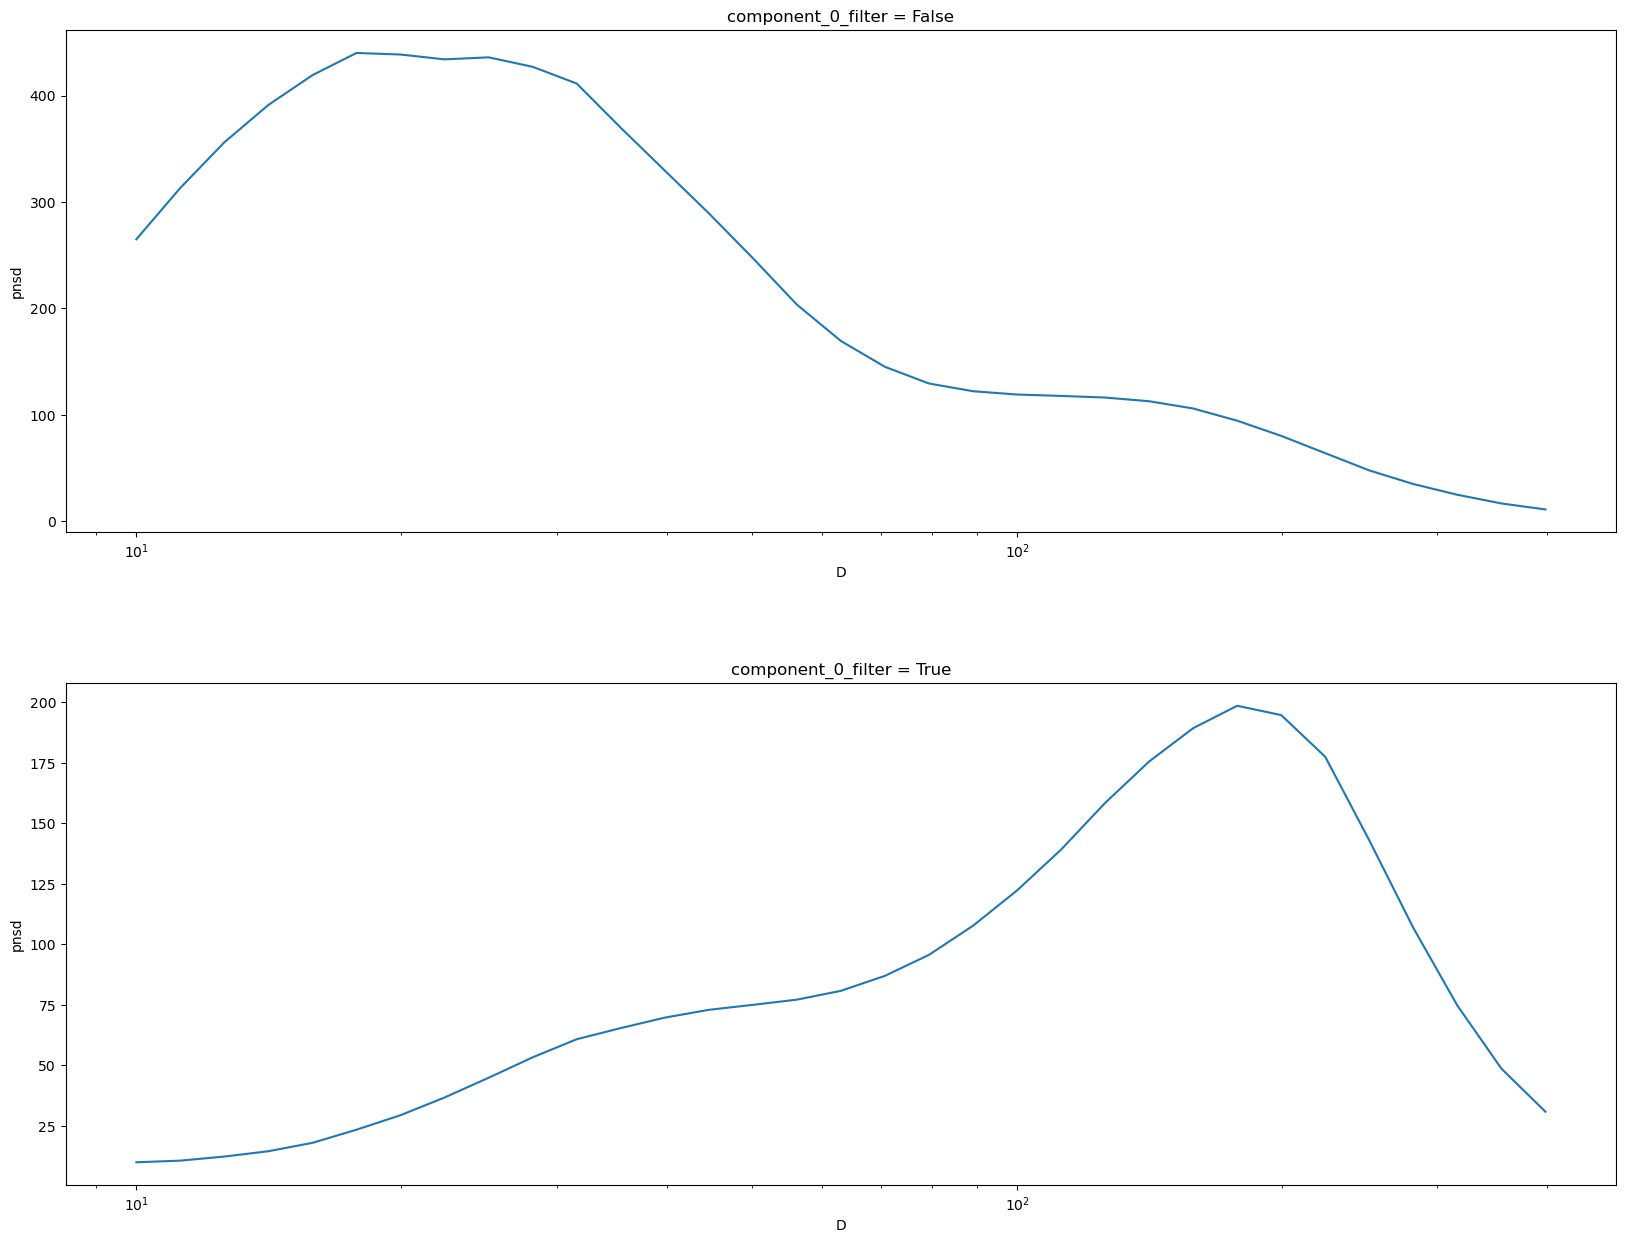

In [30]:
fig = plt.figure(figsize=(20,15))
for i in range(2):
    ax = fig.add_subplot(2,1,i+1)
    component_0_curves[i].plot()
    ax.set_xscale("log")
    
plt.subplots_adjust(wspace=0.6, hspace=0.3)

In [31]:
component_0_curves_all = data["pnsd"].groupby(data["component_0_filter"])

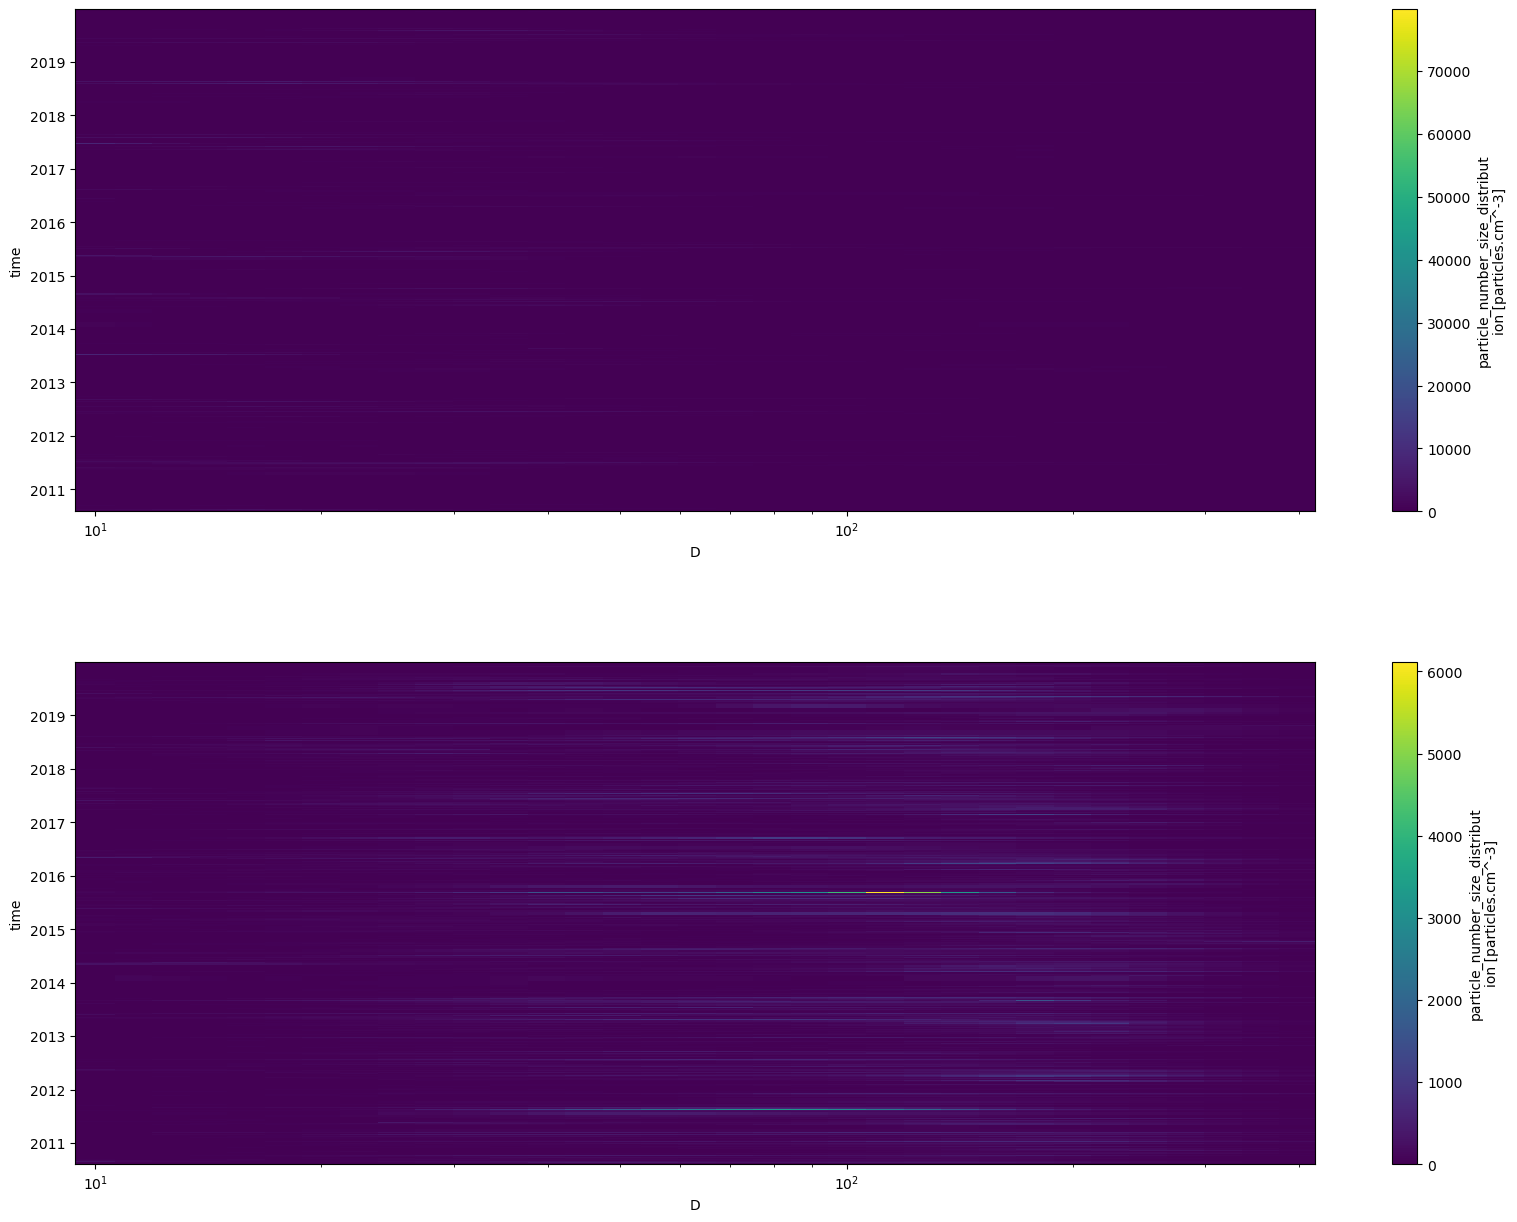

In [41]:
fig = plt.figure(figsize=(20,15))
for i in range(2):
    ax = fig.add_subplot(2,1,i+1)
    component_0_curves_all[i].plot()
    ax.set_xscale("log")
    
    
plt.subplots_adjust(wspace=0.6, hspace=0.3)